# Food Delivery Cost and Profit Analysis

In [ ]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("food_orders_new_delhi.csv")

In [3]:
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
!pip install datetime
from datetime import datetime


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
data["Order Date and Time"]=pd.to_datetime(data["Order Date and Time"])
data["Delivery Date and Time"]=pd.to_datetime(data["Delivery Date and Time"])

In [7]:
data["Discounts and Offers"]

0         5% on App
1               10%
2      15% New User
3              None
4      50 off Promo
           ...     
995       5% on App
996            None
997            None
998    15% New User
999    15% New User
Name: Discounts and Offers, Length: 1000, dtype: object

In [8]:
def extract_disc(discount):
    if 'off' in discount:
        return float(discount.split(' ')[0])
    elif "%" in discount:
        return float(discount.split("%")[0])
    else:
        return 0.0

In [9]:
data['Discount Percentage'] = data['Discounts and Offers'].apply(lambda x: extract_disc(x))                                                             

In [10]:
data["Discount Percentage"]

0       5.0
1      10.0
2      15.0
3       0.0
4      50.0
       ... 
995     5.0
996     0.0
997     0.0
998    15.0
999    15.0
Name: Discount Percentage, Length: 1000, dtype: float64

In [11]:
data["Discount Amount"]=data.apply(lambda x: (x["Order Value"] * x["Discount Percentage"]/100)
if x["Discount Percentage"]>1
else x["Discount Percentage"],axis=1)

In [12]:
# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
data['Discount Amount'] = data.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

In [13]:
print(data[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), data.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                 None                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

In [14]:
data["Total Cost"]=data["Delivery Fee"]+data["Payment Processing Fee"]+data["Discount Amount"]

In [15]:
data["Revenue"]=data["Commission Fee"]

In [16]:
data["Profit"]=data["Revenue"]-data["Total Cost"]

In [17]:
total_orders = data.shape[0]
total_revenue = data['Revenue'].sum()
total_costs = data['Total Cost'].sum()
total_profit = data['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

In [18]:
overall_metrics

{'Total Orders': 1000,
 'Total Revenue': 126990,
 'Total Costs': 232709.85,
 'Total Profit': -105719.85}

In [19]:
import matplotlib.pyplot as plt

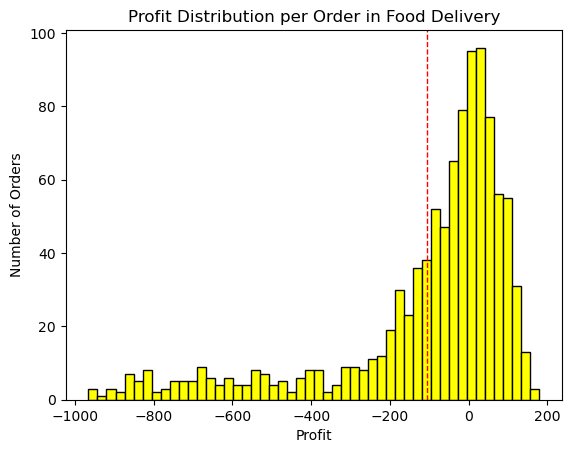

In [20]:
plt.hist(data["Profit"],bins=50,color="yellow",edgecolor="black")
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(data['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

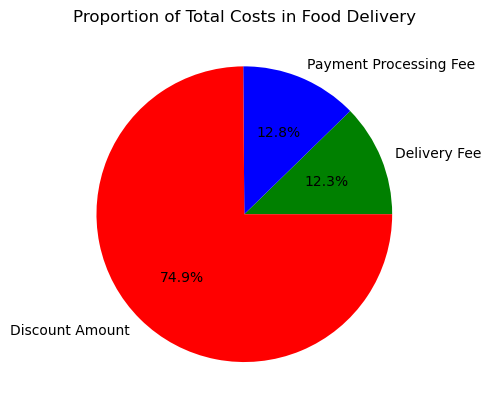

In [21]:
cost_breakdown=data[["Delivery Fee",'Payment Processing Fee', 'Discount Amount']].sum()
plt.pie(cost_breakdown,labels=cost_breakdown.index, autopct='%1.1f%%',colors=["green","blue","red"])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

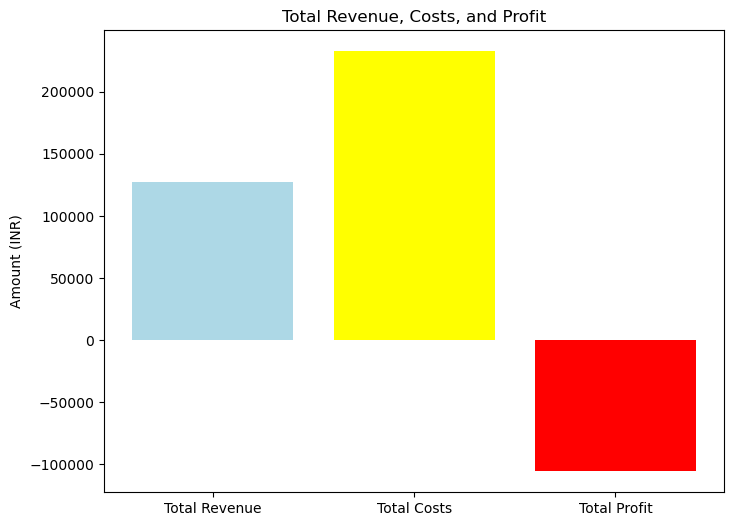

In [22]:
total= ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]
plt.figure(figsize=(8, 6))
plt.bar(total, values, color=['lightblue', 'yellow', 'red'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [27]:
profit_order=data[data["Profit"]>0]

In [34]:
profit_order["Commision Percentage"]=(profit_order["Commission Fee"]/profit_order["Order Value"]*100)

C:\Users\nisik\AppData\Local\Temp\ipykernel_26732\477238374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_order["Commision Percentage"]=(profit_order["Commission Fee"]/profit_order["Order Value"]*100)


In [35]:
profit_order["Effective_Disc"]=(profit_order["Discount Amount"]/profit_order["Order Value"])*100

C:\Users\nisik\AppData\Local\Temp\ipykernel_26732\1891652020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_order["Effective_Disc"]=(profit_order["Discount Amount"]/profit_order["Order Value"])*100


In [36]:
new_avg_commission_percentage=profit_orders["Commision Percentage"].mean()
new_avg_effective_Disc_percentage=profit_order["Effective_Disc"].mean()

In [40]:
new_avg_commission_percentage

30.508436145149446

In [38]:
new_avg_effective_Disc_percentage

5.867469879518072

In [67]:
recommended_commission_percentage = 30.0
recommended_discount_percentage = 6.0    

In [68]:
data["Simulated Commission fee"]=data["Order Value"]*(recommended_commission_percentage/100)

In [69]:
data["Simulated Discount Amount"]=data["Order Value"]* (recommended_commission_percentage / 100)

In [70]:
data["Simulated tot costs"]=(data['Delivery Fee'] +data['Payment Processing Fee'] +data['Simulated Discount Amount'])

In [71]:
data["Simulated Profit"]= (data["Simulated Commission fee"]-data["Simulated tot costs"])

In [72]:
import seaborn as sns

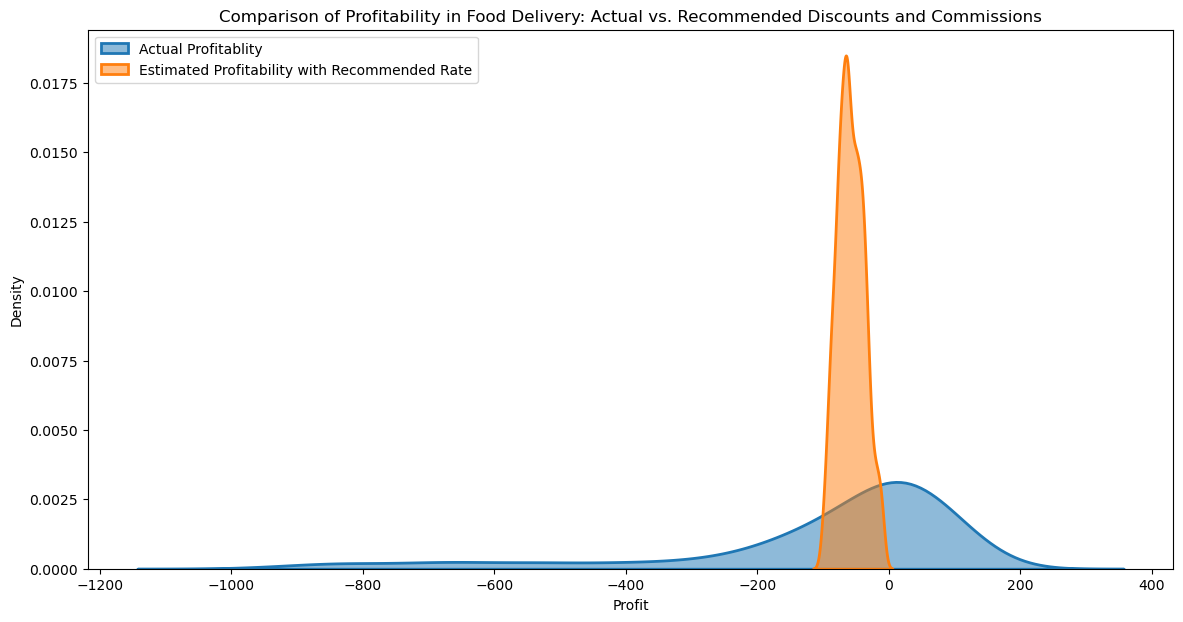

In [73]:
plt.figure(figsize=(14, 7))
sns.kdeplot(data["Profit"],label="Actual Profitablity",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(data["Simulated Profit"],label="Estimated Profitability with Recommended Rate",fill=True,alpha=0.5,linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()